# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     859.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.22e-40
Time:                        11:00:22   Log-Likelihood:                -1.0648
No. Observations:                  50   AIC:                             10.13
Df Residuals:                      46   BIC:                             17.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9839      0.088     56.742      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49175112  4.92307021  5.32305043  5.67098383  5.95363583  6.16741968
  6.3189857   6.42412866  6.50519278  6.58740057  6.69470894  6.84587304
  7.05136493  7.31165298  7.617125    7.94966739  8.28564127  8.59976617
  8.86927362  9.07764791  9.21733959  9.2910058   9.31107374  9.29769888
  9.27545351  9.26928956  9.30043908  9.38292585  9.52126137  9.70970354
  9.93320018 10.16986196 10.39455884 10.5830488  10.71596076 10.78197721
 10.77969363 10.71784922 10.61389113 10.49110791 10.37480326 10.28813873
 10.24832831 10.26381026 10.3328607  10.44387682 10.57728325 10.70874819
 10.81318105 10.8688548 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.84968624 10.72793925 10.51851478 10.25537017  9.98320521  9.74651811
  9.57871075  9.49391076  9.48351255  9.51828431]


## Plot comparison

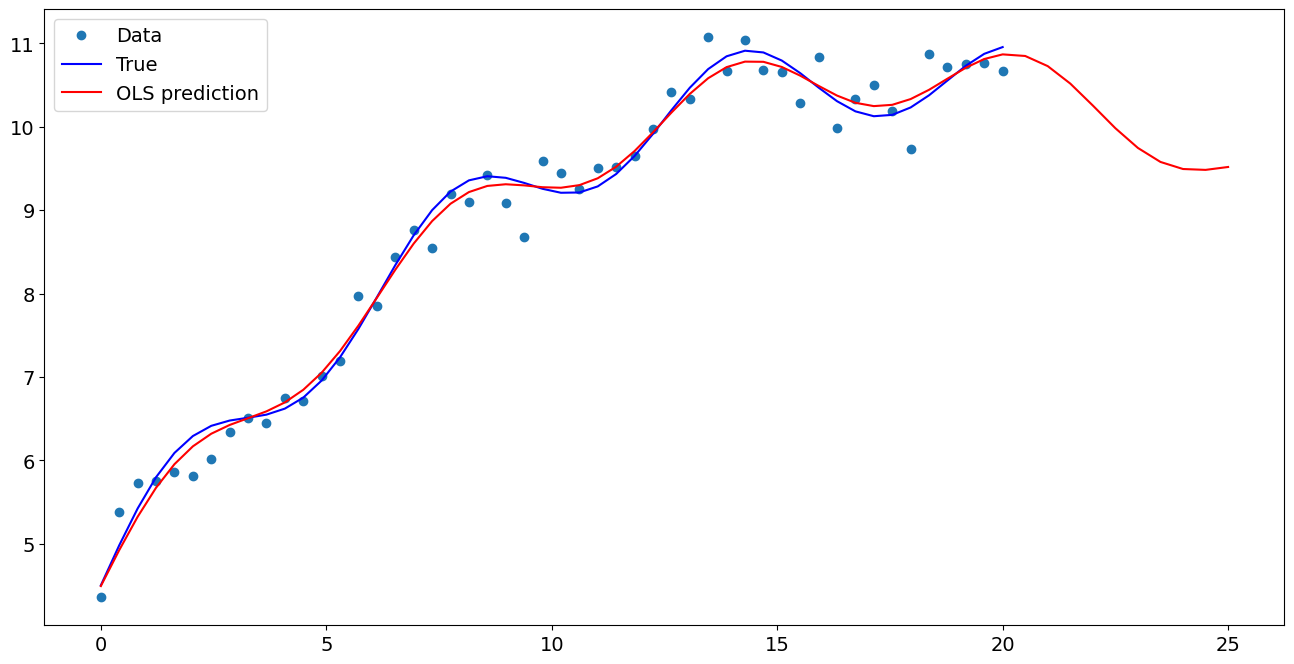

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.983940
x1                  0.498386
np.sin(x1)          0.379969
I((x1 - 5) ** 2)   -0.019688
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.849686
1    10.727939
2    10.518515
3    10.255370
4     9.983205
5     9.746518
6     9.578711
7     9.493911
8     9.483513
9     9.518284
dtype: float64